In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import proplot as plot

计算60-3kmTP的结果，绘制基本的降水、温度的平均图

In [4]:
dir_in = "/raid52/yycheng/MPAS/TP_60-3km/t2m_daily/mask_res/"
ds_obs_2012 = xr.open_dataset(dir_in + "mask_CN05.1_2012_07.nc")
ds_obs_2015 = xr.open_dataset(dir_in + "mask_CN05.1_2015_07.nc")

ds_reinit_2012 = xr.open_dataset(dir_in + "mask_t2m_daily_2012_reinit.nc")
ds_reinit_2015 = xr.open_dataset(dir_in + "mask_t2m_daily_2015_reinit.nc")

ds_run_2012 = xr.open_dataset(dir_in + "mask_t2m_daily_2012_run.nc")
ds_run_2015 = xr.open_dataset(dir_in + "mask_t2m_daily_2015_run.nc")

In [8]:
# 应急处理下：因为需要的是三小时降水的累计，这里先计算一下平均（是每日三小时降水的平均，不是每日的累计！）
# *8 得到每日的降水累计
obs_2012_mean = ds_obs_2012['tm'].mean('time')
obs_2015_mean = ds_obs_2015['tm'].mean('time')

run_2012_mean = ds_run_2012['t2m'].mean('Time') - 273.15
run_2015_mean = ds_run_2015['t2m'].mean('Time') - 273.15

reinit_2012_mean = ds_reinit_2012['t2m'].mean('Time') - 273.15
reinit_2015_mean = ds_reinit_2015['t2m'].mean('Time') - 273.15

In [21]:
# vr_rmsd_xr  = xr.DataArray(vr_rmsd_temp, coords = vr_years.coords)
run_2012_error = xr.DataArray(run_2012_mean.values - obs_2012_mean.values, coords=run_2012_mean.coords)
run_2015_error = xr.DataArray(run_2015_mean.values - obs_2015_mean.values, coords=run_2015_mean.coords)

reinit_2012_error = xr.DataArray(reinit_2012_mean.values - obs_2012_mean.values, coords=reinit_2012_mean.coords)
reinit_2015_error = xr.DataArray(reinit_2015_mean.values - obs_2015_mean.values, coords=reinit_2015_mean.coords)

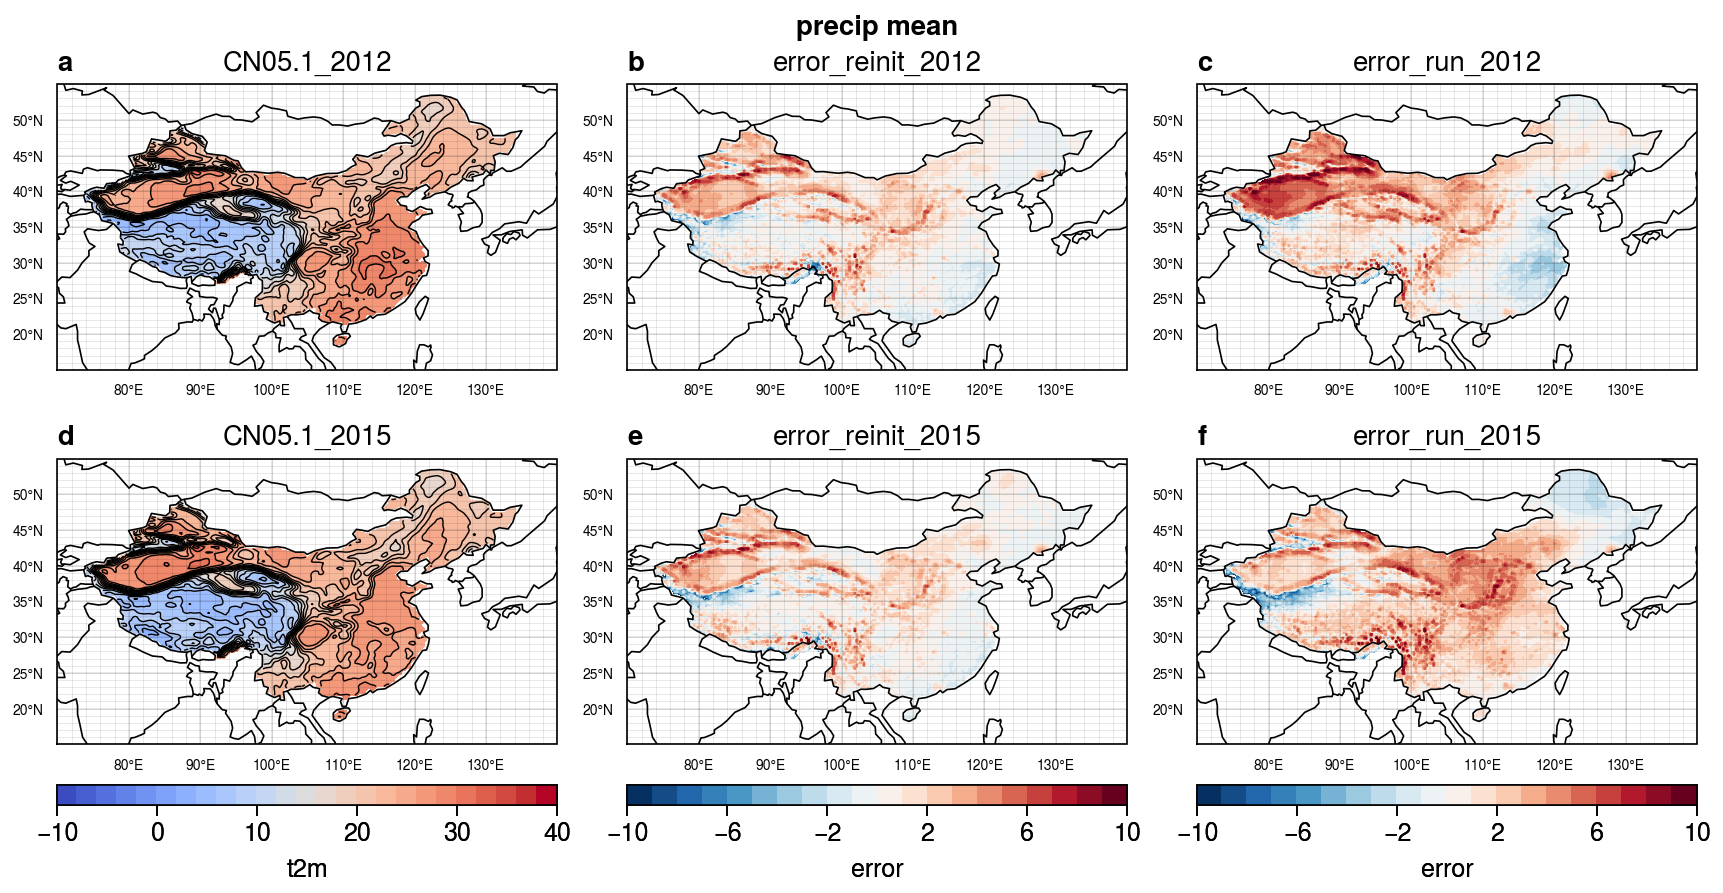

In [36]:
# import proplot as plot
from matplotlib import pyplot as plt
import proplot as plot
# ----- get filter vars coords-----

lon = run_2012_mean.longitude.values
lat = run_2012_mean.latitude.values

ticks = np.arange(-10,42,2.)
ticks_error = np.arange(-10,11,1)
#----- create plot -----
fig, axs = plot.subplots(ncols=3,nrows=2, proj=('cyl'))

#-----2012-----
axs[0].format(title='CN05.1_2012')
m = axs[0].contour(lon, lat, obs_2012_mean,\
levels=ticks,color='k',
linewidth = .5)
m_overlay = axs[0].contourf(lon, lat, obs_2012_mean,\
levels=ticks,
cmap="coolwarm")

# m = axs[1].contour(lon, lat, reinit_2012_mean,\
# levels=ticks,color='k',
# linewidth = .5)
axs[1].format(title='error_reinit_2012')
m_overlay = axs[1].contourf(lon, lat, reinit_2012_error,\
levels=ticks_error,
cmap="RdBu_r")

# m = axs[2].contour(lon, lat, run_2012_mean,\
# levels=ticks,color='k',
# linewidth = .5)
axs[2].format(title='error_run_2012')
m_overlay = axs[2].contourf(lon, lat, run_2012_error,\
levels=ticks_error,
cmap="RdBu_r")

#-----2015-----
m = axs[3].contour(lon, lat, obs_2015_mean,\
levels=ticks,color='k',
linewidth = .5)
axs[3].format(title='CN05.1_2015')
m_overlay_axs3 = axs[3].contourf(lon, lat, obs_2015_mean,\
levels=ticks,
cmap="coolwarm")

# m = axs[1].contour(lon, lat, reinit_2015_mean,\
# levels=ticks,color='k',
# linewidth = .5)
axs[4].format(title='error_reinit_2015')
m_overlay = axs[4].contourf(lon, lat, reinit_2015_error,\
levels=ticks_error,
cmap="RdBu_r")

# m = axs[2].contour(lon, lat, run_2015_mean,\
# levels=ticks,color='k',
# linewidth = .5)
axs[5].format(title='error_run_2015')
m_overlay = axs[5].contourf(lon, lat, run_2015_error,\
levels=ticks_error,
cmap="RdBu_r")
# format作为整个proplot集中对属性进行修改的method
axs.format(
abc=True,
lonlim=(70, 140), latlim=(15, 55), coast=True,
#-----GEO axis-----
borders = True,
labels = True,
gridlabelsize = 5,
gridminor = True,
# ticklen = 10,
# borderslinewidth=.5,
longridminor=2,
latgridminor =2,
longrid  = True,
latgrid  = True,
# latlines = 10,
# lonlines = 10,
# lonlocator = np.arange(70,140,10),
# latlocator = np.arange(15,55,10),
#-----line label-----
# linewidth = 0.5,
suptitle="precip mean",
)
#----- add contour tick labels -----
# axs.clabel(m, inline=True, fontsize=5, colors = 'k', fmt='%4.0f',use_clabeltext=True, inline_spacing=0)
axs[3].colorbar(m_overlay_axs3, loc='b', width=0.1, title="t2m")
axs[4].colorbar(m_overlay, loc='b', width=0.1, title="error")
axs[5].colorbar(m_overlay, loc='b', width=0.1, title="error")
# fig.colorbar(m_overlay, loc='b', length = 1., width=0.1,
# ticklabelsize=5,ticks=ticks)

fig.patch.set_facecolor('white')
plt.savefig('./output_pic/t2m_spatial.png', dpi=300, facecolor= "white")